# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder


# Reading the Dataset

In [2]:
df=pd.read_csv(r'C:\Users\hp\Downloads\heart.csv')

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


| Column             | Description                                               |
| ------------------ | --------------------------------------------------------- |
| **Age**            | Age of the person in years.                               |
| **Sex**            | Gender (Male/Female).                                     |
| **ChestPainType**  | Type of chest pain experienced (e.g., ATA, NAP, ASY, TA). |
| **RestingBP**      | Resting blood pressure in mm Hg.                          |
| **Cholesterol**    | Serum cholesterol in mg/dl.                               |
| **FastingBS**      | Fasting blood sugar (>120 mg/dl → 1, else 0).             |
| **RestingECG**     | Resting electrocardiogram results.                        |
| **MaxHR**          | Maximum heart rate achieved during exercise.              |
| **ExerciseAngina** | Exercise-induced angina (Yes/No).                         |
| **Oldpeak**        | ST depression induced by exercise relative to rest.       |
| **ST_Slope**       | The slope of the peak exercise ST segment.                |
| **HeartDisease**   | Target variable: 1 (Disease) or 0 (No Disease).           |


# checking shape

In [4]:
df.shape

(918, 12)

# checking info and describe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Age: Mean ≈ 53 years; most people are middle-aged.

RestingBP: Average around 130 mmHg (slightly above normal).

Cholesterol: Mean ≈ 200–250 mg/dL; some high cholesterol cases.

MaxHR: Mean around 150 bpm; lower MaxHR linked to disease presence.

Oldpeak: Range from 0 to 6, showing some high stress levels.

# checking unique values in each column

In [7]:
col=df.columns
for i in col:
    u=df[i].unique()
    print(f'unique values in {i}:',u)

unique values in Age: [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
unique values in Sex: ['M' 'F']
unique values in ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
unique values in RestingBP: [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
unique values in Cholesterol: [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 24

In [8]:
# Replace 0s with NaN in invalid columns
df['RestingBP'] = df['RestingBP'].replace(0, np.nan)
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)



# Handling missing values

In [9]:
df.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [10]:
df['RestingBP'].fillna(df['RestingBP'].median(), inplace=True)
df['Cholesterol'].fillna(df['Cholesterol'].median(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_1660\3094119010.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RestingBP'].fillna(df['RestingBP'].median(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_1660\3094119010.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [11]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# outlier detection

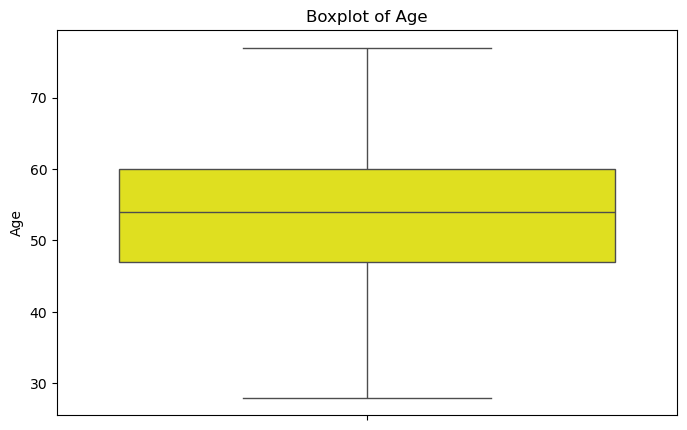

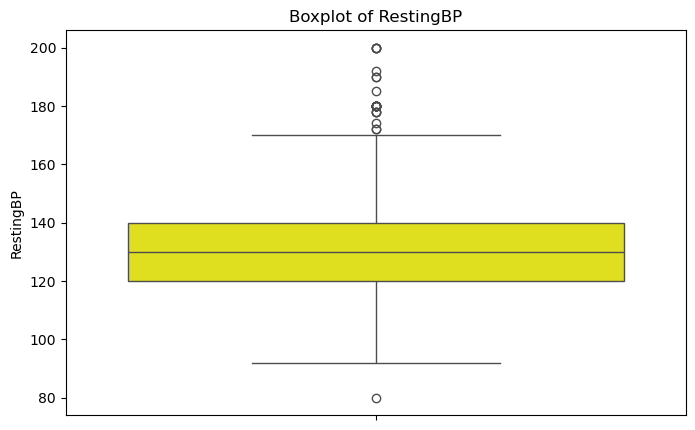

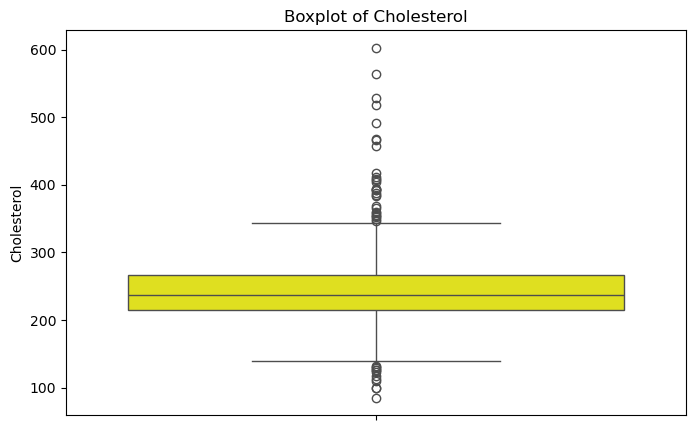

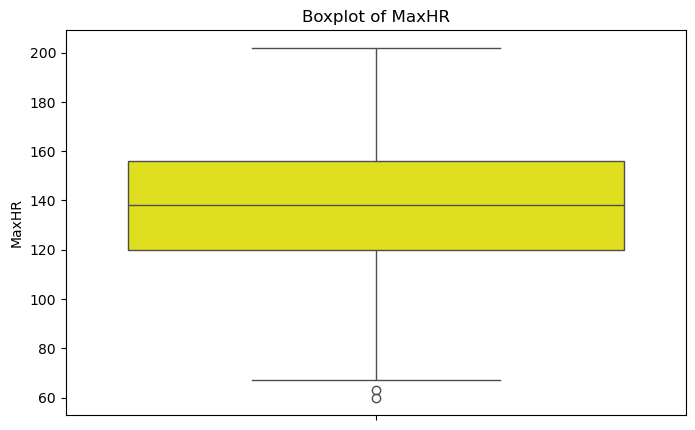

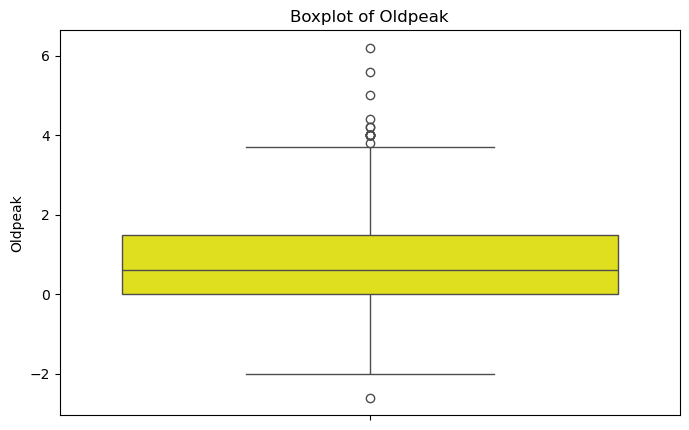

In [12]:
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for col in num_cols:
    plt.figure(figsize=(8, 5))

    sns.boxplot(df[col],color='yellow')
    plt.title(f'Boxplot of {col}')
    plt.show()

Outliers present in Cholesterol, RestingBP, and Oldpeak.

In [13]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
                      np.where(df[col] > upper, upper, df[col]))


caps outliers — replaces very small values with the lower limit, very large values with the upper limit, and keeps normal values unchanged.

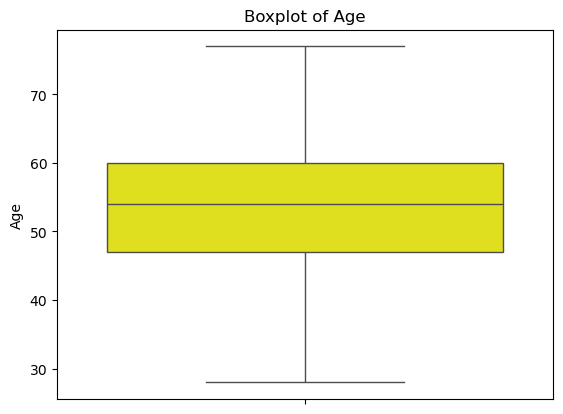

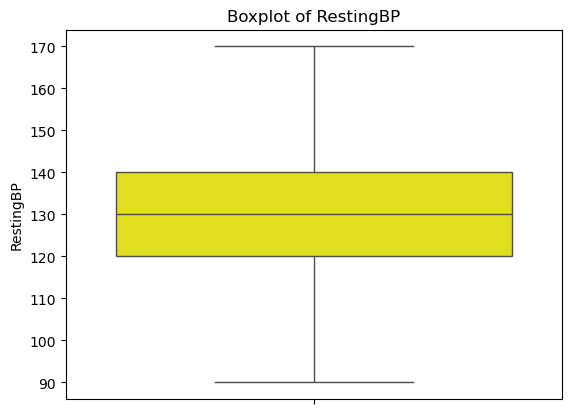

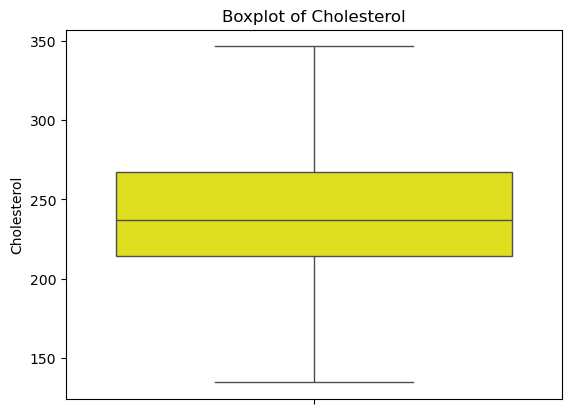

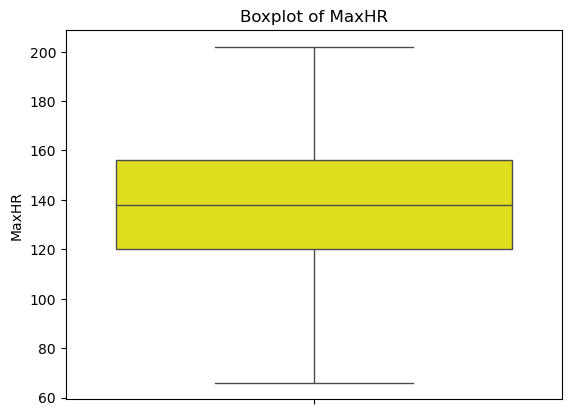

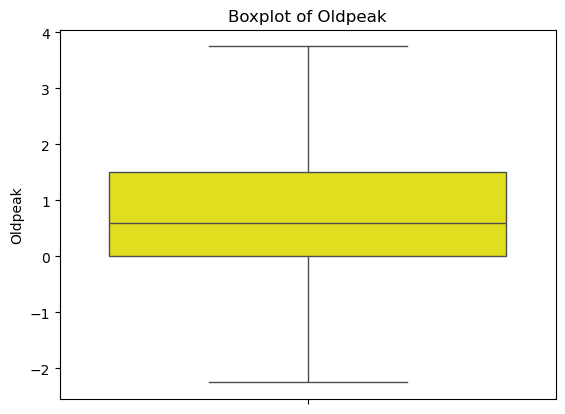

In [14]:
for col in num_cols:
    sns.boxplot(df[col],color='yellow')
    plt.title(f'Boxplot of {col}')
    plt.show()

# Univariate,Bivariate,Multivariate analysis

##### Hist plot

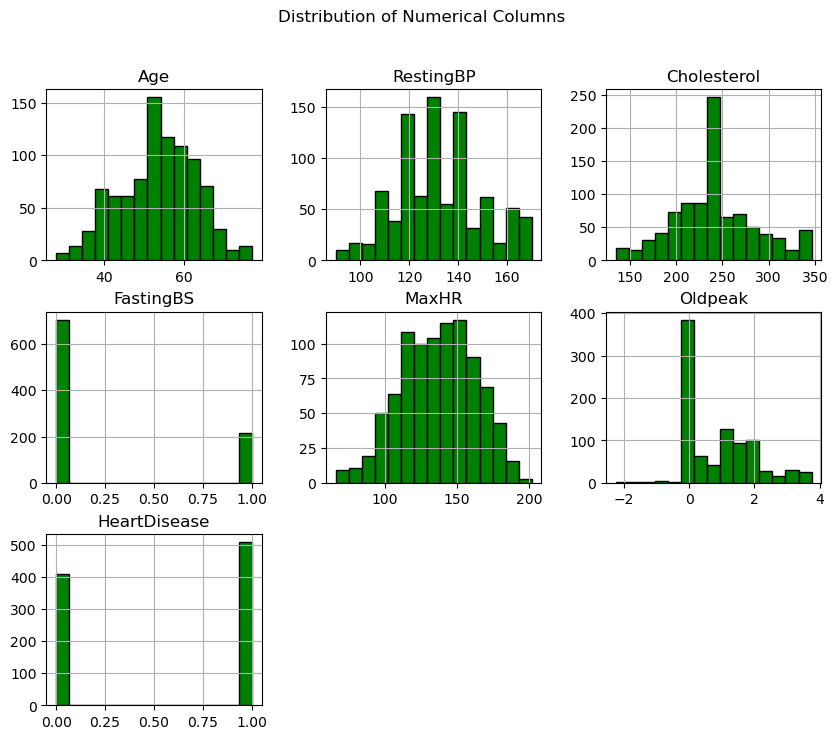

In [15]:
df.hist(figsize=(10,8),  color='green',bins=15, edgecolor='black')         
plt.suptitle('Distribution of Numerical Columns')
plt.show()


Age: Most people between 40–60 years.

Cholesterol: Right-skewed (a few very high values).

MaxHR: Normally distributed around 150.

Oldpeak: Many values near 0 (no ST depression).

##### count plot

C:\Users\hp\AppData\Local\Temp\ipykernel_1660\232600644.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2',edgecolor='black')


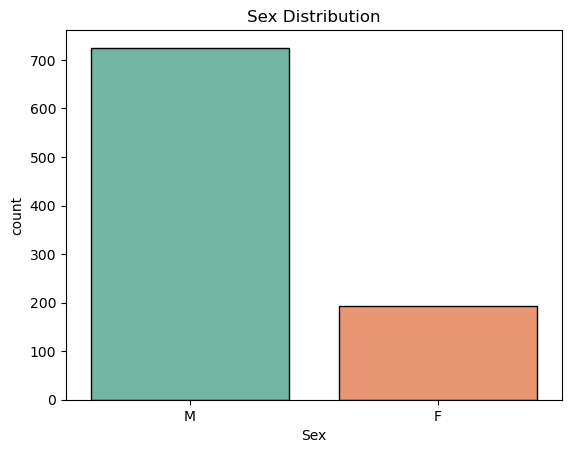

C:\Users\hp\AppData\Local\Temp\ipykernel_1660\232600644.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2',edgecolor='black')


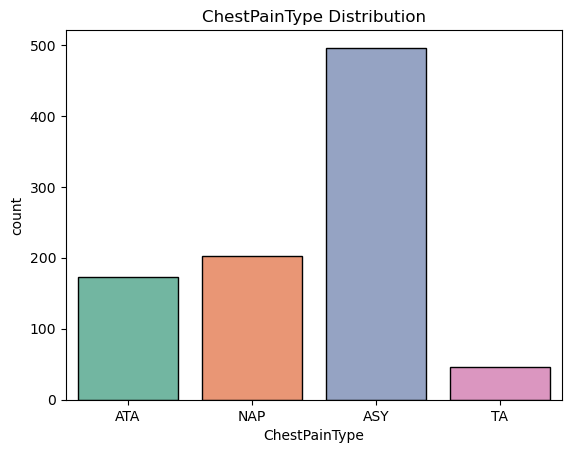

C:\Users\hp\AppData\Local\Temp\ipykernel_1660\232600644.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2',edgecolor='black')


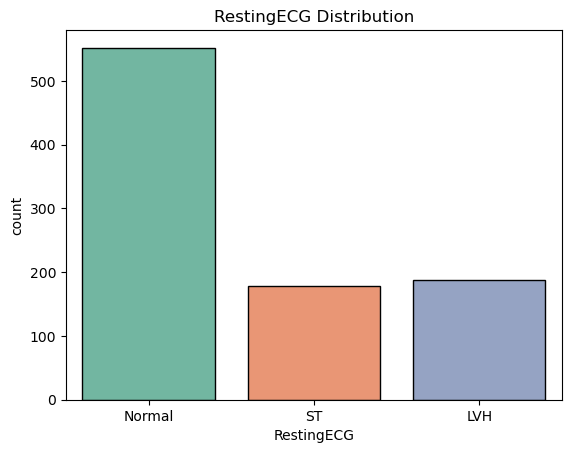

C:\Users\hp\AppData\Local\Temp\ipykernel_1660\232600644.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2',edgecolor='black')


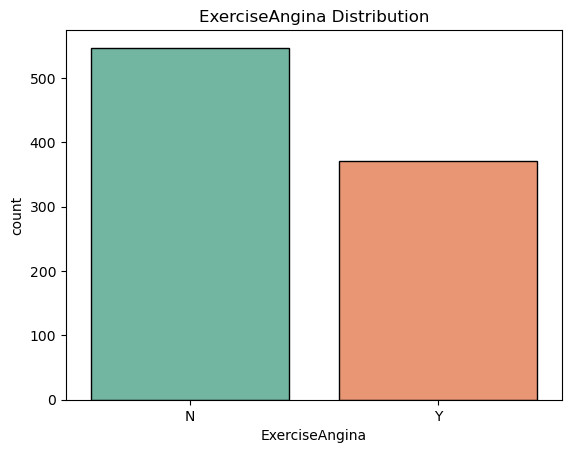

C:\Users\hp\AppData\Local\Temp\ipykernel_1660\232600644.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2',edgecolor='black')


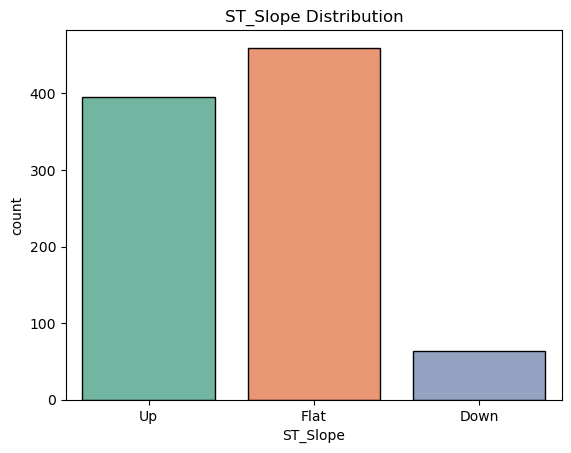

C:\Users\hp\AppData\Local\Temp\ipykernel_1660\232600644.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2',edgecolor='black')


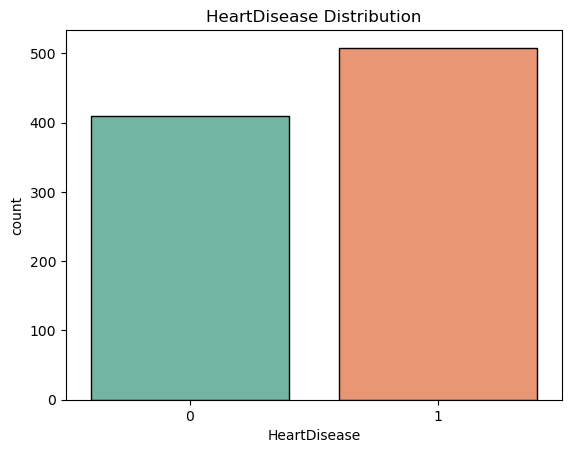

In [16]:
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
for col in cat_cols:
    sns.countplot(x=col, data=df, palette='Set2',edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.show()


Sex: More males than females.

ChestPainType: “ASY” (asymptomatic) most frequent — common in heart disease cases.

ST_Slope: “Flat” type most frequent among heart patients.

##### boxplot

C:\Users\hp\AppData\Local\Temp\ipykernel_1660\3245368518.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='HeartDisease', ylabel='Age'>

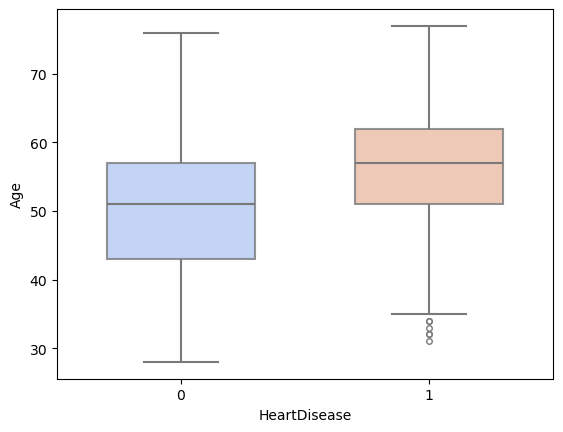

In [17]:
sns.boxplot(
    x='HeartDisease',
    y='Age',
    data=df,
    palette='coolwarm',     # 🎨 adds color (try 'viridis', 'Set2', 'pastel', etc.)
    width=0.6,
    fliersize=4,            # outlier marker size
    linewidth=1.5,          # border thickness
    boxprops=dict(alpha=0.8) # slight transparency for smooth look
)

→ Older individuals show a higher probability of heart disease.

##### count plot

<Axes: xlabel='Sex', ylabel='count'>

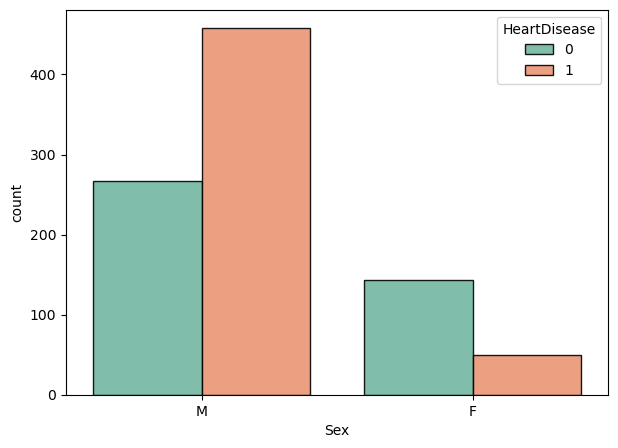

In [18]:
plt.figure(figsize=(7, 5))
sns.countplot(
    x='Sex', 
    hue='HeartDisease', 
    data=df,
    palette='Set2',          # 🎨 add attractive color scheme (try 'coolwarm', 'pastel', 'mako', etc.)
    edgecolor='black',       # add border to bars
    alpha=0.9                # slight transparency
)

→ Males more prone to heart disease than females.

##### violin plot

C:\Users\hp\AppData\Local\Temp\ipykernel_1660\3393784015.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y='Cholesterol', data=df, palette='pastel')


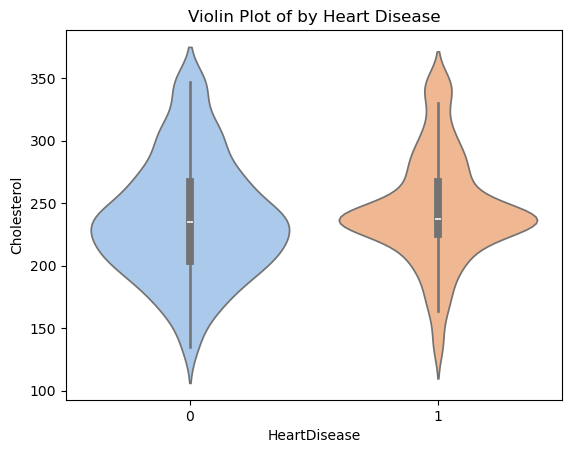

In [19]:
sns.violinplot(x='HeartDisease', y='Cholesterol', data=df, palette='pastel')
plt.title(f'Violin Plot of by Heart Disease')
plt.show()


People with heart disease may have slightly higher cholesterol levels, but the overlap is significant.

##### Heatmap

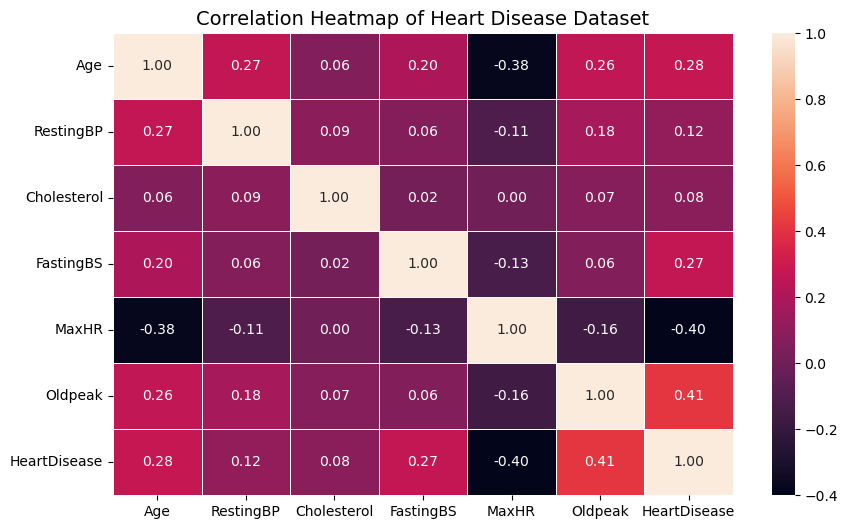

In [20]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='rocket', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Heart Disease Dataset', fontsize=14)
plt.show()


##### HeartDisease & Oldpeak → positive	           -> Higher ST depression is linked to higher heart disease risk.
##### HeartDisease & MaxHR → negative	           -> Lower maximum heart rate is often seen in heart patients.
##### HeartDisease & Age → positive	                ->Heart disease is more common in older individuals.
##### RestingBP & Cholesterol → weak correlation	->These features are not strongly related in this dataset.

##### Scatter plot

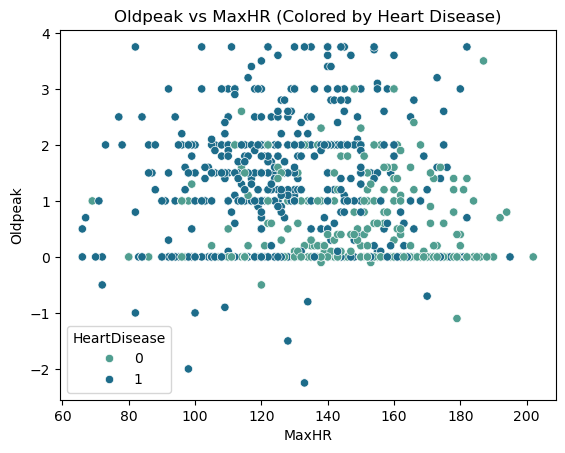

In [21]:
sns.scatterplot(x='MaxHR', y='Oldpeak', hue='HeartDisease', data=df,palette='crest')
plt.title('Oldpeak vs MaxHR (Colored by Heart Disease)')
plt.show()


Patients with low MaxHR and high Oldpeak are mostly diagnosed with heart disease.

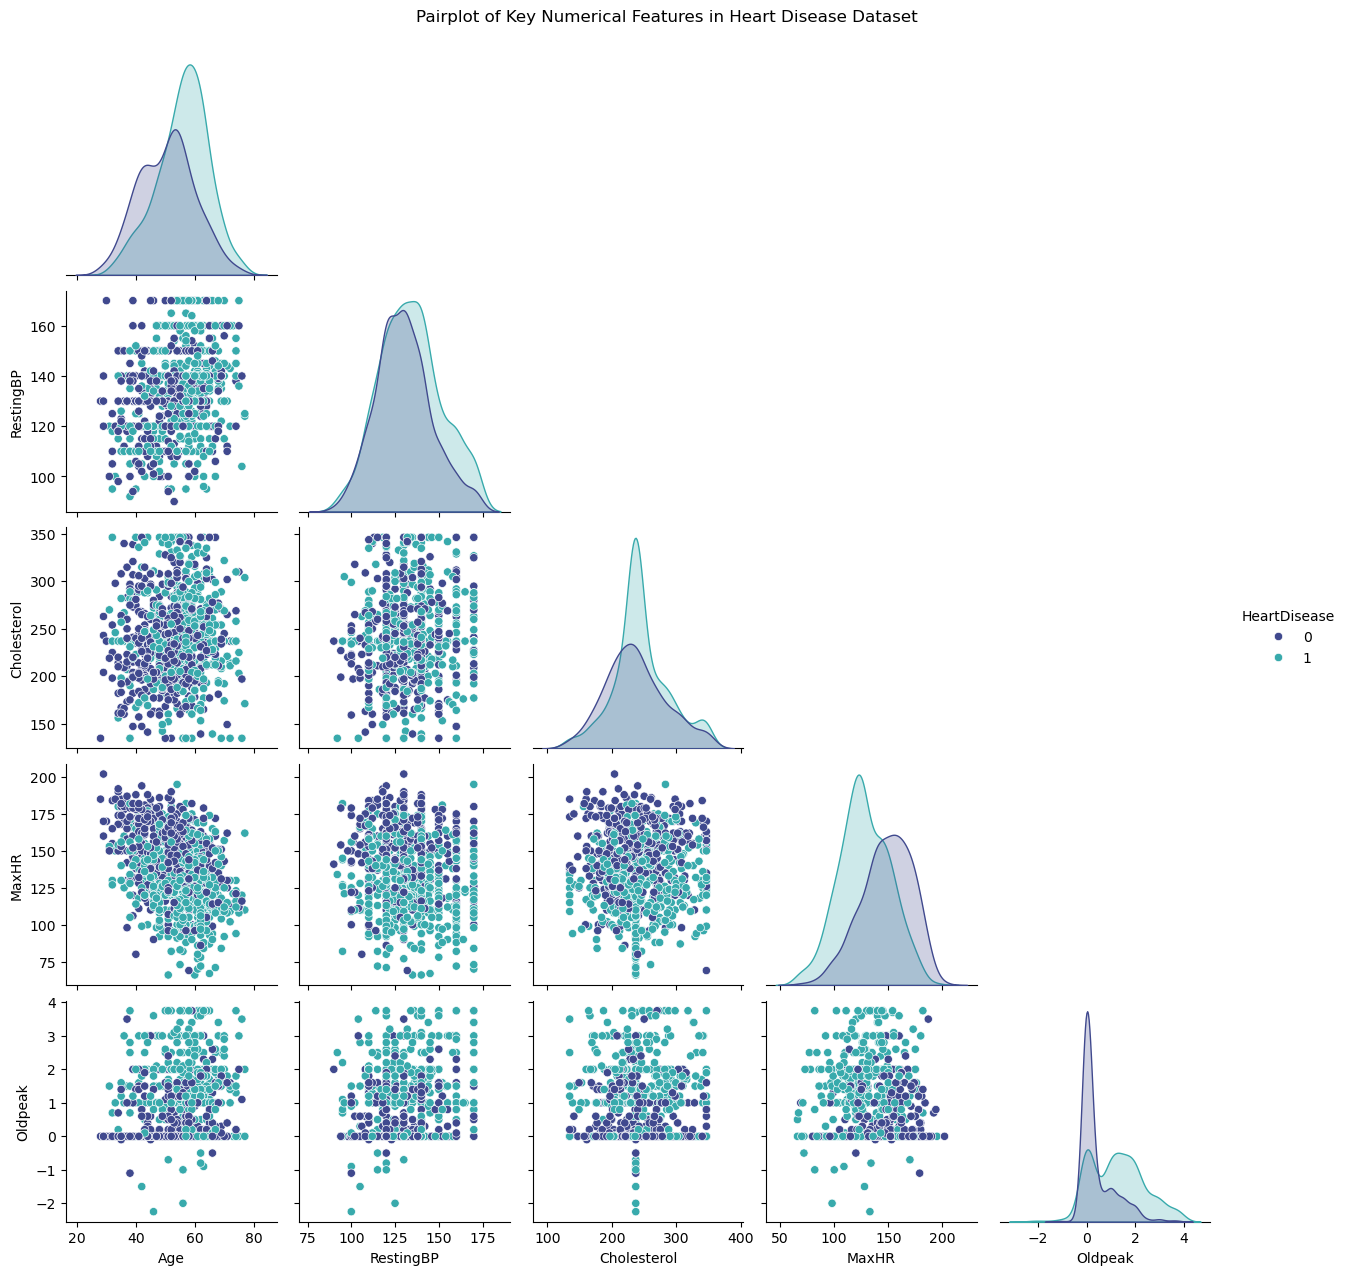

In [22]:
# Select numerical columns 
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak','HeartDisease']
sns.pairplot(df[num_cols], hue='HeartDisease', palette='mako', diag_kind='kde',corner=True)
plt.suptitle('Pairplot of Key Numerical Features in Heart Disease Dataset', y=1.02)
plt.show()


##### Age vs MaxHR	=People with heart disease (red) tend to have lower maximum heart rates and are older.
##### Oldpeak vs MaxHR	= Negative relationship — higher Oldpeak values are linked to lower MaxHR and higher chance of heart disease.
##### Cholesterol vs Age	= Weak visible relationship — cholesterol varies widely at all ages.
##### RestingBP vs Age	= Slight upward trend — blood pressure tends to increase with age.
##### Oldpeak vs HeartDisease	= Clear separation — higher Oldpeak values more common in heart disease patients.

# Encoding

Machine learning models and scaling methods can only handle numeric data.


In [23]:
df=pd.get_dummies(df)


In [24]:
df.shape

(918, 21)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    float64
 1   RestingBP          918 non-null    float64
 2   Cholesterol        918 non-null    float64
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    float64
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    bool   
 8   Sex_M              918 non-null    bool   
 9   ChestPainType_ASY  918 non-null    bool   
 10  ChestPainType_ATA  918 non-null    bool   
 11  ChestPainType_NAP  918 non-null    bool   
 12  ChestPainType_TA   918 non-null    bool   
 13  RestingECG_LVH     918 non-null    bool   
 14  RestingECG_Normal  918 non-null    bool   
 15  RestingECG_ST      918 non-null    bool   
 16  ExerciseAngina_N   918 non

In [26]:
df.drop(columns=['RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Down'], inplace=True)


In [27]:
k=['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
 'HeartDisease', 'Sex_M',
 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']


In [28]:
df.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40.0,140.0,289.0,0,172.0,0.0,0,False,True,False,True,False,False,True,False,False,True
1,49.0,160.0,180.0,0,156.0,1.0,1,True,False,False,False,True,False,True,False,True,False
2,37.0,130.0,283.0,0,98.0,0.0,0,False,True,False,True,False,False,True,False,False,True
3,48.0,138.0,214.0,0,108.0,1.5,1,True,False,True,False,False,False,False,True,True,False
4,54.0,150.0,195.0,0,122.0,0.0,0,False,True,False,False,True,False,True,False,False,True


In [29]:
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(0, inplace=True)


# Scaling

In [30]:
from sklearn.preprocessing import RobustScaler

In [31]:
scaler=RobustScaler()

In [32]:
scaled_data=scaler.fit_transform(df)

In [33]:
df=pd.DataFrame(scaled_data,columns=df.columns)

In [34]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.076923,0.5,0.981132,0.0,0.944444,-0.400000,-1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0
1,-0.384615,1.5,-1.075472,0.0,0.500000,0.266667,0.0,1.0,-1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-1.307692,0.0,0.867925,0.0,-1.111111,-0.400000,-1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0
3,-0.461538,0.4,-0.433962,0.0,-0.833333,0.600000,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0
4,0.000000,1.0,-0.792453,0.0,-0.444444,-0.400000,-1.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.692308,-1.0,0.509434,0.0,-0.166667,0.400000,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
914,1.076923,0.7,-0.830189,1.0,0.083333,1.866667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
915,0.230769,0.0,-1.933962,0.0,-0.638889,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0
916,0.230769,0.0,-0.018868,0.0,1.000000,-0.400000,0.0,1.0,-1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df.dtypes

Age                  float64
RestingBP            float64
Cholesterol          float64
FastingBS            float64
MaxHR                float64
Oldpeak              float64
HeartDisease         float64
Sex_F                float64
Sex_M                float64
ChestPainType_ASY    float64
ChestPainType_ATA    float64
ChestPainType_NAP    float64
ChestPainType_TA     float64
ExerciseAngina_N     float64
ExerciseAngina_Y     float64
ST_Slope_Flat        float64
ST_Slope_Up          float64
dtype: object

# Model Building

In [36]:
x=df.drop("HeartDisease",axis=1)

In [37]:
x

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.076923,0.5,0.981132,0.0,0.944444,-0.400000,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0
1,-0.384615,1.5,-1.075472,0.0,0.500000,0.266667,1.0,-1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-1.307692,0.0,0.867925,0.0,-1.111111,-0.400000,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0
3,-0.461538,0.4,-0.433962,0.0,-0.833333,0.600000,1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0
4,0.000000,1.0,-0.792453,0.0,-0.444444,-0.400000,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.692308,-1.0,0.509434,0.0,-0.166667,0.400000,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
914,1.076923,0.7,-0.830189,1.0,0.083333,1.866667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
915,0.230769,0.0,-1.933962,0.0,-0.638889,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0
916,0.230769,0.0,-0.018868,0.0,1.000000,-0.400000,1.0,-1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
y=df["HeartDisease"]

In [39]:
y

0     -1.0
1      0.0
2     -1.0
3      0.0
4     -1.0
      ... 
913    0.0
914    0.0
915    0.0
916    0.0
917   -1.0
Name: HeartDisease, Length: 918, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model=LogisticRegression()

In [44]:
model=model.fit(x_train,y_train)

In [45]:
y_pred=model.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy=accuracy_score(y_test,y_pred)

In [48]:
accuracy

0.8586956521739131

In [49]:
new_data=[[-1.076923,0.5,0.981132,0.0,0.944444,-0.400000,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0]]

In [50]:
predicted=model.predict(new_data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [51]:
predicted

array([-1.])